<a href="https://colab.research.google.com/github/xper100/AIBootCamp-Project/blob/main/Section_1_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Goal of Project

> 다음 분기에 출시할 게임 설계를 위한 인사이트 도출





## Data Description

* Name - 게임명

* Platform - 게임이 출시된 플랫폼 (i.e. PC,PS4, etc.)

* Year - 출시년도 (~2017)

* Genre - 게임장르

* Publisher - 출판사

* NA_Sales - 북미 출고량 (100만)

* EU_Sales - 유럽 출고량 (100만)

* JP_Sales - 일본 출고량 (100만)

* Other_Sales - 기타지역 출고량 (100만)

* Global_Sales - 전세계 출고량 (100만)








### Import Dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import scipy.stats as stats
import warnings
warnings.filterwarnings(action='ignore')

sns.set_style("white")
sns.set_context("talk")

# 한글 사용 설정 
plt.rcParams['font.family']='NanumGothic'
plt.rcParams['axes.unicode_minus'] = False


df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/AI부트캠프/Section 1 Project/vgames2.csv")
df.drop(df.columns[0], axis = 1, inplace = True)
df.head(20)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0,0,0
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0,0,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0,0,0.02,0
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0,0,0
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0,0.04
5,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0,0,0.14,0
6,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0,0
7,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0,0.11,0.01
8,Imabikisou,PS3,2007.0,Adventure,Sega,0,0,0.04,0
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0,0.01


## Data Description

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         16598 non-null  object 
 1   Platform     16598 non-null  object 
 2   Year         16327 non-null  float64
 3   Genre        16548 non-null  object 
 4   Publisher    16540 non-null  object 
 5   NA_Sales     16598 non-null  object 
 6   EU_Sales     16598 non-null  object 
 7   JP_Sales     16598 non-null  object 
 8   Other_Sales  16598 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.1+ MB


In [ ]:
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

In [ ]:
df.describe()

,Year
count,16327.000000
mean,1994.242543
std,155.077168
min,0.000000
25%,2003.000000
50%,2007.000000
75%,2010.000000
max,2020.000000


## 1. Data Manupulation

### 1.1 Sales Data

float으로 표현되어야 할 데이터가 string을 포함하고 있는것을 확인.

왜 object로 되어있는지 확인해보자!

In [ ]:
num_col = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
for col in num_col:
  counts = df[col].str.extract('([a-zA-Z])', expand = False).value_counts() # extract all alphabets in a dataset as a seies or index(expand = False)
  print("column : {0}\n{1}\n".format(col, counts))

column : NA_Sales
M    100
K    100
Name: NA_Sales, dtype: int64

column : EU_Sales
M    100
K    100
Name: EU_Sales, dtype: int64

column : JP_Sales
K    100
M     99
Name: JP_Sales, dtype: int64

column : Other_Sales
M    100
K    100
Name: Other_Sales, dtype: int64



> Unit의 정보가 같이 포함되어서 object로 인식하는 것을 확인

모든 단위가 million으로 표현되기 때문에 million으로 manipulation 진행!

$$1M = 1000K$$






In [ ]:
cond_M = (df['EU_Sales'].str.extract('([a-zA-Z])', expand = False) == 'M')
df['EU_Sales'][cond_M].apply(lambda x: re.sub("([a-zA-Z])","",x)).astype(float)

10       0.33
36       0.03
176      0.01
217      0.01
460      0.27
         ... 
16165    0.01
16268    0.05
16347    0.00
16384    0.04
16571    0.00
Name: EU_Sales, Length: 100, dtype: float64

In [ ]:
for col in num_col:
  cond_k = (df[col].str.extract('([a-zA-Z])', expand = False) == 'K') # K의 단위를 가진 데이터
  cond_m = (df[col].str.extract('([a-zA-Z])', expand = False) == 'M') # M의 단위를 가진 데이터

  # Delete 'K' unit and convert it in million
  df[col][cond_k] = df[col][cond_k].apply(lambda x: re.sub("([a-zA-Z])","",x)).astype(float)
  df[col][cond_k] = df[col][cond_k]/1000 # Convert a unit

  # Delete 'M' unit
  df[col][cond_m] = df[col][cond_m].apply(lambda x: re.sub("([a-zA-Z])","",x)).astype(float)
  
  # Now, convert all numeric columns into integer
  df[col] = df[col].astype(float)


In [ ]:
df.head(20)

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04
5,Power Pro Kun Pocket 8,DS,2005.0,Sports,Konami Digital Entertainment,0.00,0.00,0.14,0.00
6,JASF: Jane's Advanced Strike Fighters,PC,2011.0,Simulation,Deep Silver,0.02,0.01,0.00,0.00
7,Samurai Warriors: State of War,PSP,2005.0,Action,Tecmo Koei,0.07,0.00,0.11,0.01
8,Imabikisou,PS3,2007.0,Adventure,Sega,0.00,0.00,0.04,0.00
9,The Penguins of Madagascar: Dr. Blowhole Retur...,PS3,2011.0,Action,THQ,0.04,0.03,0.00,0.01


### 1.2 Year

In [ ]:
df['Year'].value_counts()

2009.0    1421
2008.0    1418
2010.0    1252
2007.0    1199
2011.0    1129
          ... 
14.0         2
13.0         2
94.0         1
2020.0       1
86.0         1
Name: Year, Length: 62, dtype: int64

In [ ]:
# Check all values less than 1000
cond_1000 = (df['Year'] < 1000)
df['Year'][cond_1000].value_counts()

9.0     10
8.0     10
11.0    10
3.0      7
6.0      7
10.0     7
15.0     5
16.0     5
4.0      4
5.0      4
95.0     4
7.0      3
98.0     3
0.0      3
2.0      3
96.0     3
14.0     2
97.0     2
1.0      2
13.0     2
12.0     2
86.0     1
94.0     1
Name: Year, dtype: int64

Year 데이터에 네자리수가 아닌 한 두자릿수로 표현되는 데이터 발견

* 앞의 두자릿수 < 21 = 2000년대

* 앞의 두자릿수 > 21 = 1900년대

In [ ]:
cond_1000 = (df['Year'] < 1000)
df['Year'][cond_1000] = df['Year'][cond_1000].apply(lambda x: x + 2000 if x < 21 else x + 1900)

* 2020년 데이터가 존재 - Outlier

In [ ]:
np.sort(df['Year'].unique())

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016., 2017., 2020.,   nan])

In [ ]:
# Delete data in 2020
delete_index = df[(df['Year'] == 2020)].index
df.drop(delete_index, inplace = True)

## 2. Missing Values

In [ ]:
df.isnull().sum()

Name             0
Platform         0
Year           271
Genre           50
Publisher       58
NA_Sales         0
EU_Sales         0
JP_Sales         0
Other_Sales      0
dtype: int64

### 2.1 Genre & Publisher

In [ ]:
publisher_na =  ( df['Publisher'].isnull() )
genre_na =  ( df['Genre'].isnull() )

# Check if there is any data with na values of both 'Publisher' and 'Genre'
both_na =  ( publisher_na & genre_na )
df[both_na]

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales


둘다 NA를 가지는 데이터는 없다. 

### Genre

* Action = Shooter, Action, Platform, Fighting

* Sports = Racing, Sports

* Role-Playing 

* Simulation

* Strategy

* Puzzle
 
* Misc

* Adventure


Reference: https://www.studytonight.com/3d-game-engineering-with-unity/genres-of-game

In [ ]:
# Define function to fill out missing values with a reasonable one
def contain_word(string, word, result):
  if word in string:
    return result

#------------------------------------------------------------------------#

# Sports 
sports = ['NFL', 'FIFA', 'Basketball', 'NBA', 'Soccer', 'Football', 'Baseball']
for sport in sports:
  genre_na = (df['Genre'].isnull())
  df['Genre'][genre_na] = df['Name'][genre_na].apply(lambda x: contain_word(x,sport, 'Sports'))

#------------------------------------------------------------------------#

# Acion 
actions = ['Action', 'Grand Theft', 'LEGO', 'Warriors']
for action in actions:
  genre_na = (df['Genre'].isnull())
  df['Genre'][genre_na] = df['Name'][genre_na].apply(lambda x: contain_word(x,action, 'Action'))

#------------------------------------------------------------------------#

# Fighting
fights = ['Fight', 'Combat', 'Fighters', 'Heroes','Naruto', 'Bleach', 'Tournament', 
          'Fighter', 'Street', 'Battle']
for fight in fights:
  genre_na = (df['Genre'].isnull())
  df['Genre'][genre_na] = df['Name'][genre_na].apply(lambda x: contain_word(x,fight, 'Fighting'))

#------------------------------------------------------------------------#

# Racing 
racings = ['Moto', 'Racing', 'Gear', 'Circuit', 'Wheel', 'Race', 'ride', 'Bike', 'Drive', 
           'Taxi', 'Rush', 'Raod', 'Trip','Speed', 'race', 'bike', 'moto']
for racing in racings:
  genre_na = (df['Genre'].isnull())
  df['Genre'][genre_na] = df['Name'][genre_na].apply(lambda x: contain_word(x,racing, 'Racing'))

#------------------------------------------------------------------------#

# Shooter
shooters = ['Bullet', 'Shoot', 'Rifle','Battlefield', 'Space', 'Dead', 'Kill',
           'Robot', 'Gun','gun', 'Tank', 'Invasion', 'Storm', 'Call of Duty']
for shooter in shooters:
  genre_na = (df['Genre'].isnull())
  df['Genre'][genre_na] = df['Name'][genre_na].apply(lambda x: contain_word(x,shooter, 'Shooter'))

#------------------------------------------------------------------------#

# Role-Playing
roles = ['Yu-Gi-Oh', 'Kingdom', 'System', 'Story', 'Role', 'Playing', 'Quest', 
         'Throne', 'Tale', 'Final Fantasy', 'RPG', 'Fantasy', 'multiplayer',]
for role in roles:
  genre_na = (df['Genre'].isnull())
  df['Genre'][genre_na] = df['Name'][genre_na].apply(lambda x: contain_word(x,role, 'Role-Playing'))

#------------------------------------------------------------------------#

# Adventure
adventures = ['Crime', 'Adventure', 'Island', 'Utopia', 'Journey', 'Pirate', 'Pokemon',
              'Mummy', 'Zombie', 'Survive', 'Survival', 'Escape', 'Farm', 'Life']
              
for adventure in adventures:
  genre_na = (df['Genre'].isnull())
  df['Genre'][genre_na] = df['Name'][genre_na].apply(lambda x: contain_word(x,adventure, 'Adventure'))

#------------------------------------------------------------------------#

# Simulation
simulations = ['Simulation', 'Manager', 'Tycoon', 'Sim', 'Cook', 'Bake', 'Shop', 'Dance', 
               'Simulator', 'Cuisine', 'Club', 'Town', 'City', 'Hotel', 'Music', 'Festival', 'Idol', 'Audition',
               'Mania', 'Episode', 'Series', 'Creator']

for simulation in simulations:
  genre_na = (df['Genre'].isnull())
  df['Genre'][genre_na] = df['Name'][genre_na].apply(lambda x: contain_word(x,simulation, 'Simulation'))

#------------------------------------------------------------------------#

# Strategy
Strategy = ['Tactics', 'Strategy', 'War', 'Nation', '3D', 'Defence', 'Arena']

for Strategy in Strategy:
  genre_na = (df['Genre'].isnull())
  df['Genre'][genre_na] = df['Name'][genre_na].apply(lambda x: contain_word(x,Strategy, 'Strategy'))

#------------------------------------------------------------------------#

# Puzzle
Puzzle = ['Puzzle', 'Tetris', 'Wave', 'Cube', 'Test', 'Quiz','Guess', 'Qube', 'Pop', 
          'Move', 'Quest']

for Puzzle in Puzzle:
  genre_na = (df['Genre'].isnull())
  df['Genre'][genre_na] = df['Name'][genre_na].apply(lambda x: contain_word(x,Puzzle, 'Puzzle'))

#------------------------------------------------------------------------#

# Misc
Misc = ['Party', 'School', 'Sing', 'Show', 'Casual', 'Logic', 'Music', 'Trivia',
        'Board', 'Card']

for Misc in Misc:
  genre_na = (df['Genre'].isnull())
  df['Genre'][genre_na] = df['Name'][genre_na].apply(lambda x: contain_word(x,Misc, 'Misc'))

In [ ]:
df['Genre'].isnull().sum()

28

Replace the rest of NA's as Misc (Other Games) 

In [ ]:
df['Genre'][genre_na] = 'Misc'

### Publisher

데이터 분석에서 Publisher는 불필요한 정보를 제공하여 제거.

In [ ]:
df.drop('Publisher', axis = 1, inplace = True)

### Year

Platform과 Year의 연관성이 있을까?

Reference: https://en.wikipedia.org/wiki/Video_game_console

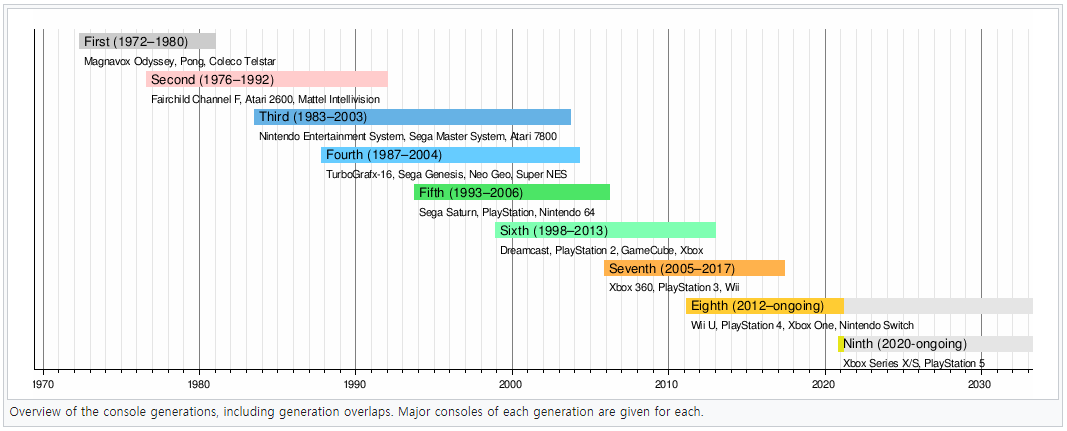

#### Platform 정보

In [ ]:
# 31 Platforms exist
df['Platform'].value_counts()

DS      2162
PS2     2161
PS3     1329
Wii     1325
X360    1265
PSP     1213
PS      1196
PC       960
XB       824
GBA      822
GC       556
3DS      509
PSV      413
PS4      336
N64      319
SNES     239
XOne     213
SAT      173
WiiU     143
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
PCFX       1
GG         1
Name: Platform, dtype: int64

In [ ]:
# Dataframe with only 'Platform' and 'Year' feature without NA values in 'Year'
df1 = df[['Year', 'Platform']]
df1_not_na = df1[-df1.isnull()].reset_index()
df1_not_na.drop('index',axis = 1, inplace = True)

In [ ]:
# Conditions for Plotting with respect to Year
## 2010 ~ 2020
cond_2020 = ( (df1_not_na['Year'] <= 2020) & (df1_not_na['Year'] > 2010) )
df1_2020 = df1_not_na[cond_2020].reset_index()
df1_2020.drop('index', axis = 1, inplace = True)

## Platform
platform_2020 = df1_2020['Platform'].value_counts().index.tolist()


#-----------------------------------------------------------------------------#

## 2000 ~ 2010
cond_2010 = ( (df1_not_na['Year'] <= 2010) & (df1_not_na['Year'] > 2000) )
df1_2010 = df1_not_na[cond_2010].reset_index()
df1_2010.drop('index', axis = 1, inplace = True)

## Platform
platform_2010 = df1_2010['Platform'].value_counts().index.tolist()

#-----------------------------------------------------------------------------#

## ~ 2000
cond_2000 = (df1_not_na['Year'] <= 2000)
df1_2000 = df1_not_na[cond_2000].reset_index()
df1_2000.drop('index', axis = 1, inplace = True)

## Platform
platform_2000 = df1_2000['Platform'].value_counts().index.tolist()

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


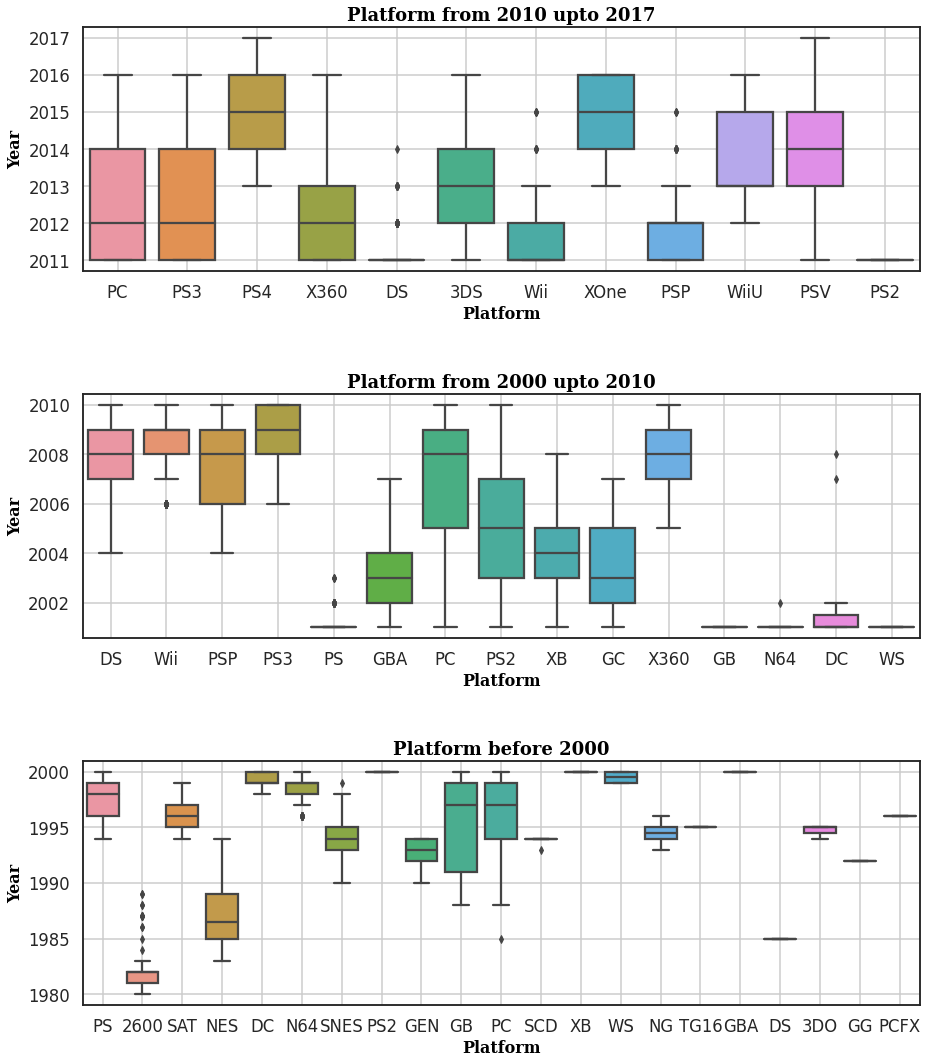

In [ ]:
fig, axes = plt.subplots(nrows = 3, ncols = 1, figsize = (15,18))

# X and Y 축
## Title
font_title = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 18,
        }


## Text
font_text = {
    'family': 'serif',
    'color':  'black',
    'weight': 'bold',
    'size': 16,
    }


sns.boxplot(x = 'Platform', y = 'Year', data = df1_2020, ax = axes[0])
axes[0].set_title("Platform from 2010 upto 2017", fontdict = font_title)
axes[0].set_xlabel('Platform', fontdict = font_text)
axes[0].set_ylabel('Year', fontdict = font_text)
axes[0].grid(True)

sns.boxplot(x = 'Platform', y = 'Year', data = df1_2010, ax = axes[1])
axes[1].set_title("Platform from 2000 upto 2010",fontdict = font_title)
axes[1].set_xlabel('Platform', fontdict = font_text)
axes[1].set_ylabel('Year', fontdict = font_text)
axes[1].grid(True)

sns.boxplot(x = 'Platform', y = 'Year', data = df1_2000, ax = axes[2])
axes[2].set_title("Platform before 2000",fontdict = font_title)
axes[2].set_xlabel('Platform', fontdict = font_text)
axes[2].set_ylabel('Year', fontdict = font_text)
axes[2].grid(True)

plt.subplots_adjust(hspace= 0.5)

plt.show()

#### Platform과 year의 관계성을 통한 결측치 처리

In [ ]:
# 연도별 가장 많은 Platform
list_mode = pd.DataFrame( df[['Platform', 'Year']].groupby('Platform').agg(lambda x:x.value_counts().index[0]) )
dic_list_mode = list_mode.to_dict()
dic_list_mode = dic_list_mode['Year']
pd.DataFrame(list(dic_list_mode.items()), columns = ['Platform', 'Year']).head(10)

,Platform,Year
0,2600,1981.0
1,3DO,1995.0
2,3DS,2011.0
3,DC,2000.0
4,DS,2008.0
5,GB,2000.0
6,GBA,2002.0
7,GC,2002.0
8,GEN,1994.0
9,GG,1992.0


In [ ]:
missing_ind = df['Year'].isna()
df.loc[missing_ind, 'Year'] = df.loc[missing_ind, 'Platform'].map(dic_list_mode)
df.loc[missing_ind]

,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
31,Rock Band,X360,2011.0,Misc,1.93,0.34,0.00,0.21
109,Yu-Gi-Oh! 5D's Wheelie Breakers (JP sales),Wii,2009.0,Racing,0.00,0.00,0.02,0.00
273,Jewel Link Chronicles: Mountains of Madness,DS,2008.0,Puzzle,0.00,0.06,0.00,0.01
358,Majesty 2: The Fantasy Kingdom Sim,X360,2011.0,Simulation,0.03,0.00,0.00,0.00
430,Famista 64,N64,1999.0,Sports,0.00,0.00,0.17,0.03
...,...,...,...,...,...,...,...,...
16240,Freaky Flyers,GC,2002.0,Racing,0.01,0.00,0.00,0.00
16275,Space Invaders,2600,1981.0,Shooter,2.36,0.14,0.00,0.03
16278,Madden NFL 11,Wii,2009.0,Sports,0.70,0.00,0.00,0.05
16425,Yoostar on MTV,X360,2011.0,Misc,0.06,0.00,0.00,0.00


'Year'데이터를 integer로 변환

In [ ]:
df['Year'] = df['Year'].astype(int)
df.head()

,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,0.04,0.00,0.00,0.00
1,The Munchables,Wii,2009,Action,0.17,0.00,0.00,0.01
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,0.00,0.00,0.02,0.00
3,Deal or No Deal: Special Edition,DS,2010,Misc,0.04,0.00,0.00,0.00
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,0.12,0.09,0.00,0.04


In [ ]:
# Check if any missing value still exists
df.isnull().sum()

Name           0
Platform       0
Year           0
Genre          0
NA_Sales       0
EU_Sales       0
JP_Sales       0
Other_Sales    0
dtype: int64

## Feature Engineering


### 1. Global Sales 

In [ ]:
df['Global_Sales'] = df[num_col].sum(axis = 1)
df.head()

,Name,Platform,Year,Genre,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Candace Kane's Candy Factory,DS,2008,Action,0.04,0.00,0.00,0.00,0.04
1,The Munchables,Wii,2009,Action,0.17,0.00,0.00,0.01,0.18
2,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010,Adventure,0.00,0.00,0.02,0.00,0.02
3,Deal or No Deal: Special Edition,DS,2010,Misc,0.04,0.00,0.00,0.00,0.04
4,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010,Platform,0.12,0.09,0.00,0.04,0.25


### 2. Platform category

In [ ]:
df['platform_category'] = df['Platform'].apply(lambda x: 'PC' if x == 'PC' else 'Console')

In [ ]:
df['platform_category'].value_counts()

Console    15637
PC           960
Name: platform_category, dtype: int64

## 필수 질문

1. 지역에 따른 게임장르의 선호도
2. 연도별 게임의 트렌드
3. 이전 출고량이 높은 게임들의 특성


모든 분석은 2010년도 이후의 상황만을 포함하고 있습니다.


### 1. 지역에 따라서 선호하는 게임 장르가 다를까


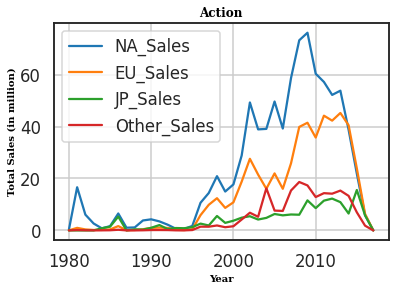

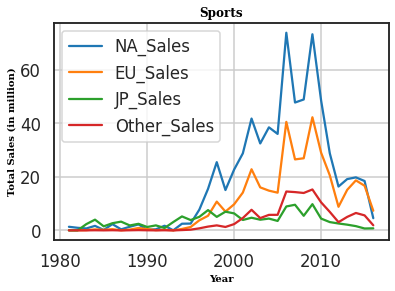

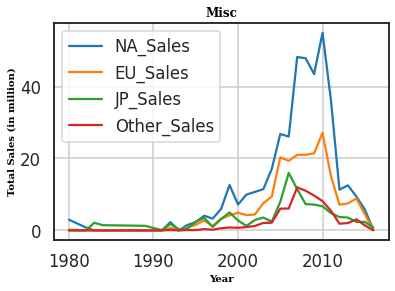

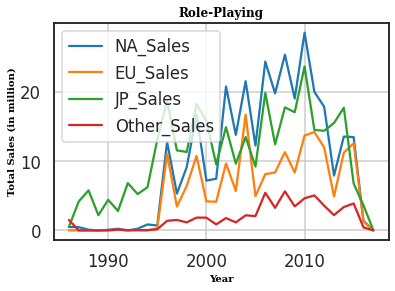

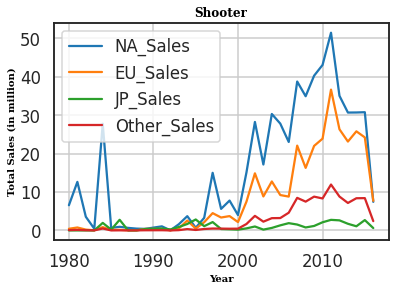

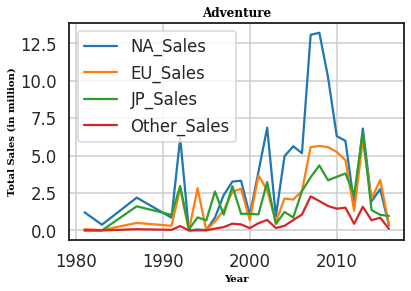

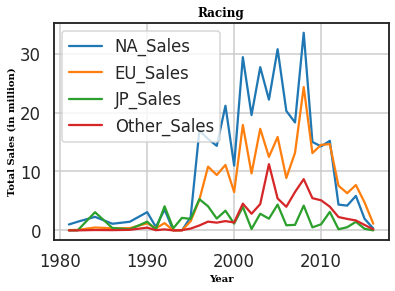

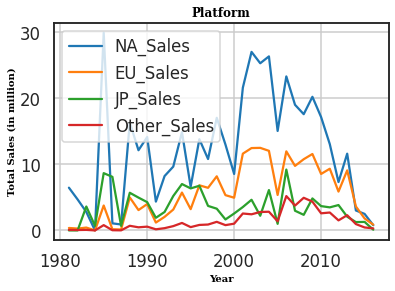

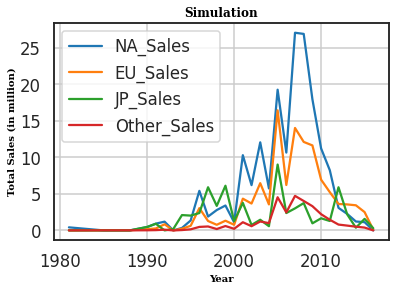

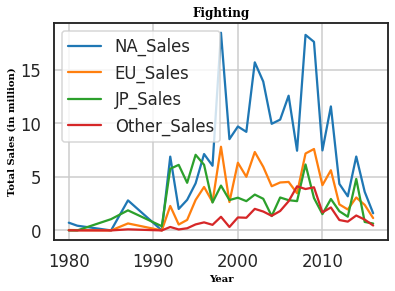

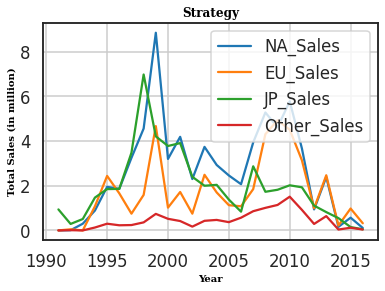

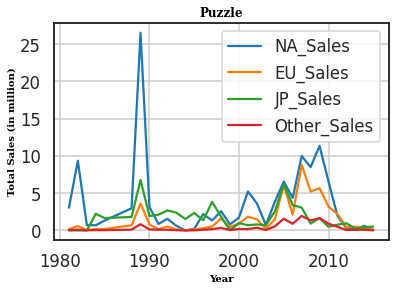

In [ ]:
# X and Y 축
## Title
font_title = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 12,
        }
## Text
font_text = {
    'family': 'serif',
    'color':  'black',
    'weight': 'bold',
    'size': 10,
    }


# Plotting
genre_list = df['Genre'].value_counts().index.to_list()
for gr in genre_list:
  cond_genre = (df['Genre'] == gr)
  df[cond_genre].groupby(by = 'Year')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum().plot(legend = True)

  
  # Text
  plt.title(gr, fontdict= font_title)
  plt.ylabel("Total Sales (in million)", fontdict= font_text)
  plt.xlabel("Year",fontdict = font_text) 

  # Background
  plt.grid(True)
  plt.show()



#### ANOVA

##### Customized Anova test 

In [ ]:
def ANOVA_test_genre(yr):
  for gr in genre_list:
    cond_genre = ((df['Genre'] == gr) & (df['Year'] >= yr))
    df_diff_area = df[cond_genre].groupby(by = 'Year')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()

    area_list = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
    statistic, pvalue = stats.f_oneway(df_diff_area['NA_Sales'], df_diff_area['EU_Sales'], df_diff_area['JP_Sales'], df_diff_area['Other_Sales'])

    def interpretation_anova(pvalue):
      answer = ""
      if pvalue < 0.05:
        answer = "No significant difference of sales in areas"
      elif pvalue >= 0.05:
        answer = "Significant difference of sales in areas"
      return answer
    if pvalue >= 0.05:
      print("Game Genre: {0}\npvalue from one way anova test: {1}\n{2}\n-------------------------------\n".format(gr, pvalue, interpretation_anova(pvalue)))
    else:
      print("Game Genre: {0}\nTrend after {1} does not exist\n".format(gr, yr))

##### After 2000

In [ ]:
ANOVA_test_genre(yr = 2000)

Game Genre: Action
Trend after 2000 does not exist

Game Genre: Sports
Trend after 2000 does not exist

Game Genre: Misc
Trend after 2000 does not exist

Game Genre: Role-Playing
Trend after 2000 does not exist

Game Genre: Shooter
Trend after 2000 does not exist

Game Genre: Adventure
Trend after 2000 does not exist

Game Genre: Racing
Trend after 2000 does not exist

Game Genre: Platform
Trend after 2000 does not exist

Game Genre: Simulation
Trend after 2000 does not exist

Game Genre: Fighting
Trend after 2000 does not exist

Game Genre: Strategy
Trend after 2000 does not exist

Game Genre: Puzzle
Trend after 2000 does not exist



##### After 2010

In [ ]:
ANOVA_test_genre(yr = 2010)

Game Genre: Action
Trend after 2010 does not exist

Game Genre: Sports
Trend after 2010 does not exist

Game Genre: Misc
Trend after 2010 does not exist

Game Genre: Role-Playing
Trend after 2010 does not exist

Game Genre: Shooter
Trend after 2010 does not exist

Game Genre: Adventure
pvalue from one way anova test: 0.07165036781821743
Significant difference of sales in areas
-------------------------------

Game Genre: Racing
Trend after 2010 does not exist

Game Genre: Platform
Trend after 2010 does not exist

Game Genre: Simulation
pvalue from one way anova test: 0.11487363825965419
Significant difference of sales in areas
-------------------------------

Game Genre: Fighting
Trend after 2010 does not exist

Game Genre: Strategy
pvalue from one way anova test: 0.2062337670096981
Significant difference of sales in areas
-------------------------------

Game Genre: Puzzle
pvalue from one way anova test: 0.3947759581852954
Significant difference of sales in areas
---------------------

##### After 2012

In [ ]:
ANOVA_test_genre(yr = 2012)

Game Genre: Action
pvalue from one way anova test: 0.05820360951470547
Significant difference of sales in areas
-------------------------------

Game Genre: Sports
Trend after 2012 does not exist

Game Genre: Misc
Trend after 2012 does not exist

Game Genre: Role-Playing
pvalue from one way anova test: 0.1525179485504746
Significant difference of sales in areas
-------------------------------

Game Genre: Shooter
Trend after 2012 does not exist

Game Genre: Adventure
pvalue from one way anova test: 0.38763914696919705
Significant difference of sales in areas
-------------------------------

Game Genre: Racing
Trend after 2012 does not exist

Game Genre: Platform
pvalue from one way anova test: 0.12346515681692044
Significant difference of sales in areas
-------------------------------

Game Genre: Simulation
pvalue from one way anova test: 0.17008788539370054
Significant difference of sales in areas
-------------------------------

Game Genre: Fighting
Trend after 2012 does not exist



### 2. 연도별 게임의 트렌드가 있을까 





#### 연도별 게임장르 판매량

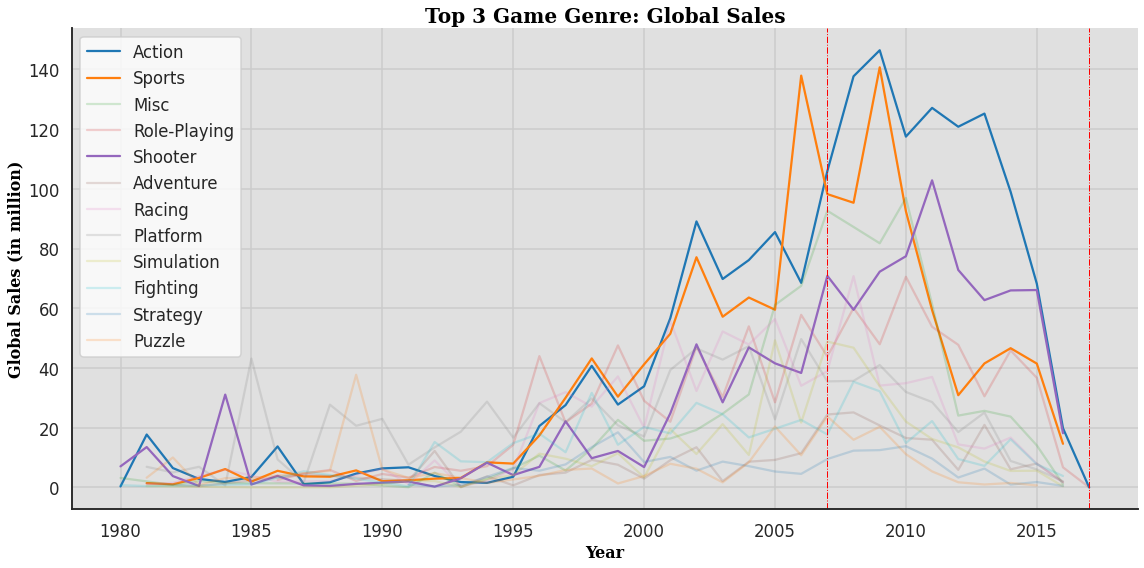

In [ ]:
genre_list = df['Genre'].value_counts().index.to_list()
fig, ax = plt.subplots(figsize = (16,8))

# Top 3 Highest Genre
top3 = ['Action', 'Shooter', 'Sports']

# Plotting
for gr in genre_list:
  gr_cond = (df['Genre'] == gr)
  # Gradient Line
  if gr in top3:
    alpha = 1
  else:
    alpha = 0.2
  # Line plot
  plt.plot('Year','Global_Sales',data =  pd.DataFrame(df[gr_cond].groupby(by = ['Year'])[['Global_Sales']].sum()).reset_index(), label = gr, alpha = alpha)



# X and Y 축
## Title
font_title = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 20,
        }
ax.set_title("Top 3 Game Genre: Global Sales", fontdict = font_title)


## Text
font_text = {
    'family': 'serif',
    'color':  'black',
    'weight': 'bold',
    'size': 16,
    }

plt.ylabel("Global Sales (in million)", fontdict = font_text)
plt.xlabel("Year",fontdict = font_text)



# Background
for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)

# Apex of Video Game Industry
ax.axvline(x = 2007, linewidth=1, color='r', linestyle = '-.')
ax.axvline(x = 2017, linewidth=1, color='r', linestyle = '-.')


ax.grid(True)
ax.set_facecolor('#E0E0E0')
plt.legend()
fig.tight_layout()
plt.show()

##### Action and Sports

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


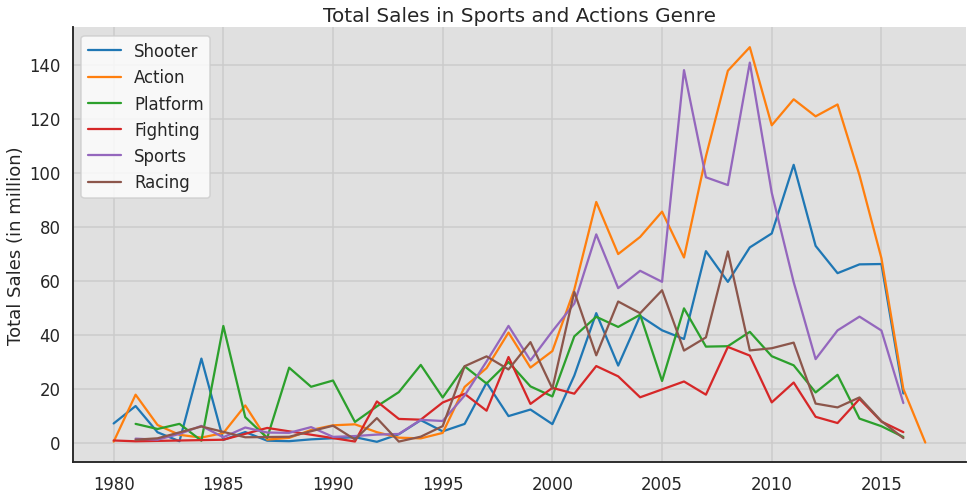

In [ ]:
action_list = ['Shooter', 'Action', 'Platform', 'Fighting', 'Sports', 'Racing']
fig, ax = plt.subplots(figsize = (16,8))
for gr in action_list:
  gr_cond = (df['Genre'] == gr)
  plt.plot('Year','Global_Sales',data =  pd.DataFrame(df[gr_cond].groupby(by = ['Year'])[['Global_Sales']].sum()).reset_index(), label = gr)

# X and Y 축
ax.set_title("Total Sales in Sports and Actions Genre", size = 20)
plt.ylabel("Total Sales (in million)")
plt.legend()


# Background
for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)

ax.grid(True)
ax.set_facecolor('#E0E0E0')

plt.show()

##### Others except for Action and Sports

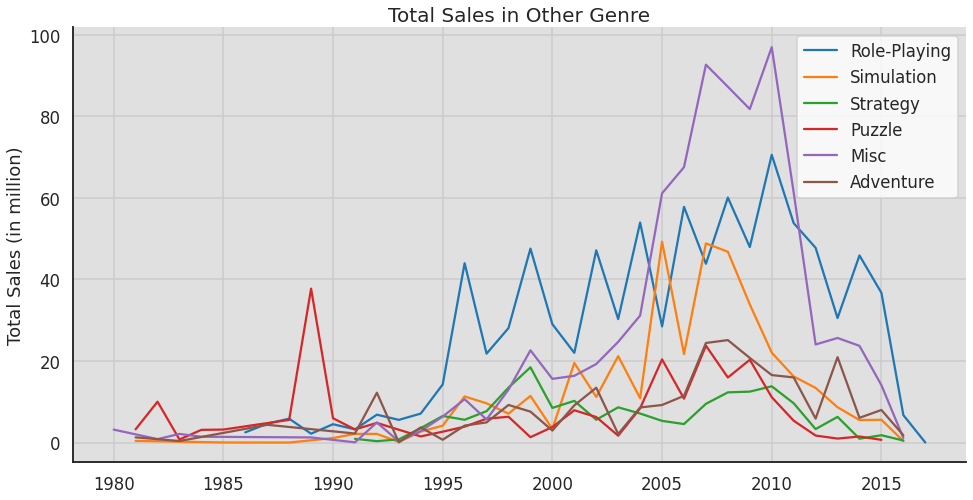

In [ ]:
non_action_list = ['Role-Playing', 'Simulation', 'Strategy', 'Puzzle', 'Misc', 'Adventure']
fig, ax = plt.subplots(figsize = (16,8))
for nac in non_action_list:
  nac_cond = (df['Genre'] == nac)
  plt.plot('Year','Global_Sales',data =  pd.DataFrame(df[nac_cond].groupby(by = ['Year'])[['Global_Sales']].sum()).reset_index(), label = nac)

# X and Y 축
ax.set_title("Total Sales in Other Genre", size = 20)
plt.ylabel("Total Sales (in million)")
plt.legend()


# Background
for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)

ax.grid(True)
ax.set_facecolor('#E0E0E0')

plt.show()




#### 연도별 출시된 장르 빈도수

In [ ]:
# Conditions for Plotting with respect to Year
## 2010 ~ 2020
cond_2020 = ( (df['Year'] <= 2020) & (df['Year'] > 2000) )
df1_2020 = df[cond_2020].reset_index()
df1_2020.drop('index', axis = 1, inplace = True)

## Platform
platform_2020 = df1_2020['Platform'].value_counts().index.tolist()


#-----------------------------------------------------------------------------#

## 2000 ~ 2010
cond_2010 = ( (df['Year'] <= 2010) & (df['Year'] > 2000) )
df1_2010 = df[cond_2010].reset_index()
df1_2010.drop('index', axis = 1, inplace = True)

## Platform
platform_2010 = df1_2010['Platform'].value_counts().index.tolist()

#-----------------------------------------------------------------------------#

## ~ 2000
cond_2000 = (df['Year'] <= 2000)
df1_2000 = df[cond_2000].reset_index()
df1_2000.drop('index', axis = 1, inplace = True)

## Platform
platform_2000 = df1_2000['Platform'].value_counts().index.tolist()

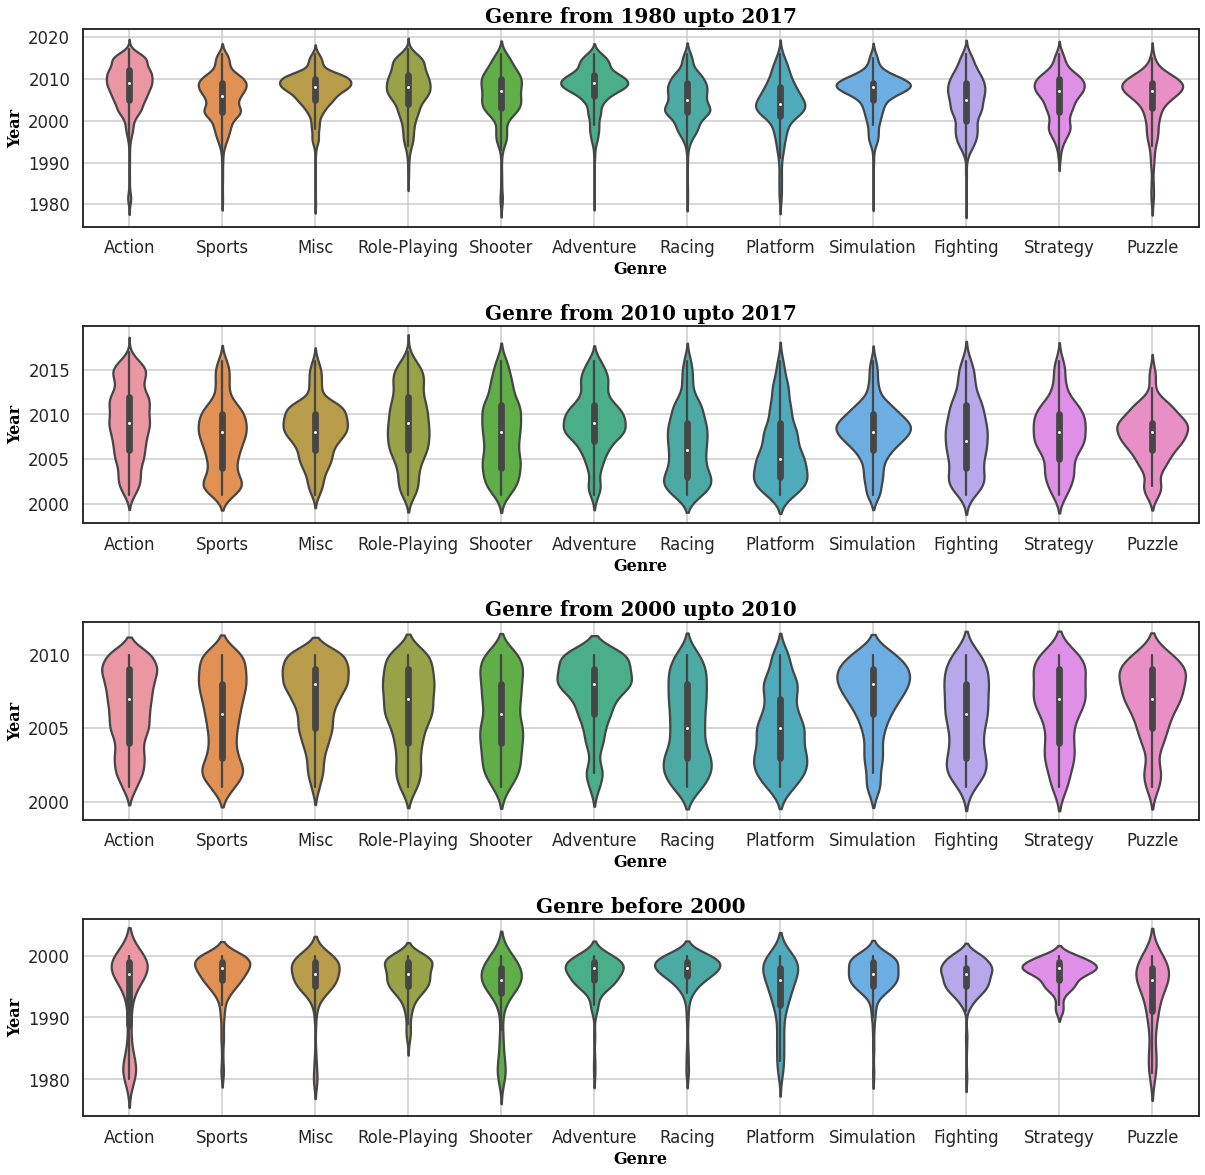

In [ ]:
fig, axes = plt.subplots(nrows = 4, ncols = 1, figsize = (20,20))
# Order of Categories
orders = df['Genre'].value_counts().index.tolist()

# Entire
sns.violinplot(x = 'Genre', y = 'Year', data = df, ax = axes[0], order = orders)
axes[0].set_title("Genre from 1980 upto 2017", fontdict = font_title)
axes[0].set_xlabel('Genre', fontdict = font_text)
axes[0].set_ylabel('Year', fontdict = font_text)
axes[0].grid(True)

# 2010~2017
sns.violinplot(x = 'Genre', y = 'Year', data = df1_2020, ax = axes[1], order = orders)
axes[1].set_title("Genre from 2010 upto 2017", fontdict = font_title)
axes[1].set_xlabel('Genre', fontdict = font_text)
axes[1].set_ylabel('Year', fontdict = font_text)
axes[1].grid(True)

# 2000~2010
sns.violinplot(x = 'Genre', y = 'Year', data = df1_2010, ax = axes[2], order = orders)
axes[2].set_title("Genre from 2000 upto 2010", fontdict = font_title)
axes[2].set_xlabel('Genre', fontdict = font_text)
axes[2].set_ylabel('Year', fontdict = font_text)
axes[2].grid(True)

# before 2000
sns.violinplot(x = 'Genre', y = 'Year', data = df1_2000, ax = axes[3], order = orders)
axes[3].set_title("Genre before 2000", fontdict = font_title)
axes[3].set_xlabel('Genre', fontdict = font_text)
axes[3].set_ylabel('Year', fontdict = font_text)
axes[3].grid(True)

plt.subplots_adjust(hspace= 0.5)
plt.show()

In [ ]:
for gr in genre_list:
  cond_genre = (df['Genre'] == gr)
  df_diff_area = df[cond_genre].groupby(by = 'Year')[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()

  area_list = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
  statistic, pvalue = stats.f_oneway(df_diff_area['NA_Sales'], df_diff_area['EU_Sales'], df_diff_area['JP_Sales'], df_diff_area['Other_Sales'])

  def interpretation_anova(pvalue):
    answer = ""
    if pvalue < 0.05:
      answer = "No significant difference of sales in areas"
    elif pvalue >= 0.05:
      answer = "Significant difference of sales in areas"
    return answer

  print("Game Genre: {0}\npvalue from one way anova test: {1}\n-------------------------------\n{2}\n-------------------------------\n".format(gr, pvalue, interpretation_anova(pvalue)))

Game Genre: Action
pvalue from one way anova test: 6.305130580999085e-08
-------------------------------
No significant difference of sales in areas
-------------------------------

Game Genre: Sports
pvalue from one way anova test: 3.0810173363506375e-07
-------------------------------
No significant difference of sales in areas
-------------------------------

Game Genre: Misc
pvalue from one way anova test: 4.144878490065389e-05
-------------------------------
No significant difference of sales in areas
-------------------------------

Game Genre: Role-Playing
pvalue from one way anova test: 4.353955059051427e-08
-------------------------------
No significant difference of sales in areas
-------------------------------

Game Genre: Shooter
pvalue from one way anova test: 3.8972937731234837e-10
-------------------------------
No significant difference of sales in areas
-------------------------------

Game Genre: Adventure
pvalue from one way anova test: 5.02258763452507e-06
--------

### 3. 출고량이 높은 게임에 대한 분석 및 시각화 


#### 2010년대 Top 3 장르 출고량



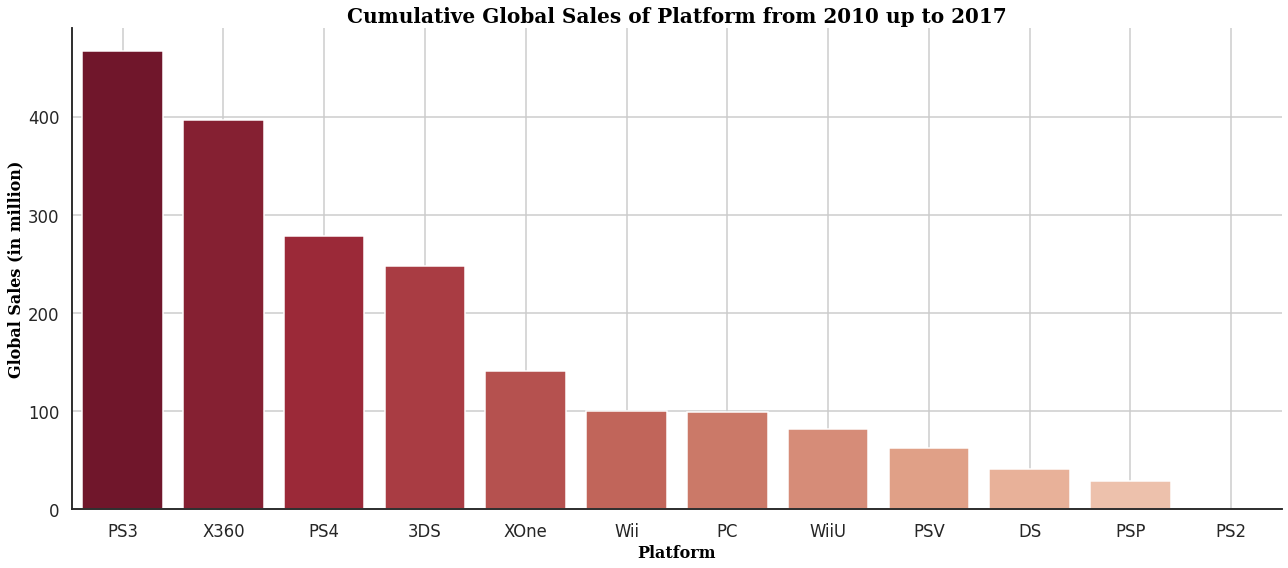

In [ ]:
# 누적출고량
yr_cond = (df['Year'] > 2010)
top_data = pd.DataFrame(df[yr_cond].groupby(by = ['Platform'])[['Global_Sales']].sum()).reset_index()
top_data.sort_values(by = 'Global_Sales', ascending=False, inplace = True)

# Platform 
fig, ax = plt.subplots(figsize = (18,8))
palette = sns.color_palette("RdBu", 31)
sns.barplot(x = 'Platform', y = 'Global_Sales', data = top_data, palette = palette)


# X and Y 축
## Title
font_title = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 20,
        }
ax.set_title("Cumulative Global Sales of Platform from 2010 up to 2017", fontdict = font_title)


## Text
font_text = {
    'family': 'serif',
    'color':  'black',
    'weight': 'bold',
    'size': 16,
    }

plt.ylabel("Global Sales (in million)", fontdict = font_text)
plt.xlabel("Platform",fontdict = font_text)



# Background
for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)

ax.grid(True)
ax.set_facecolor('white')
fig.tight_layout()
plt.show()

##### Barpot

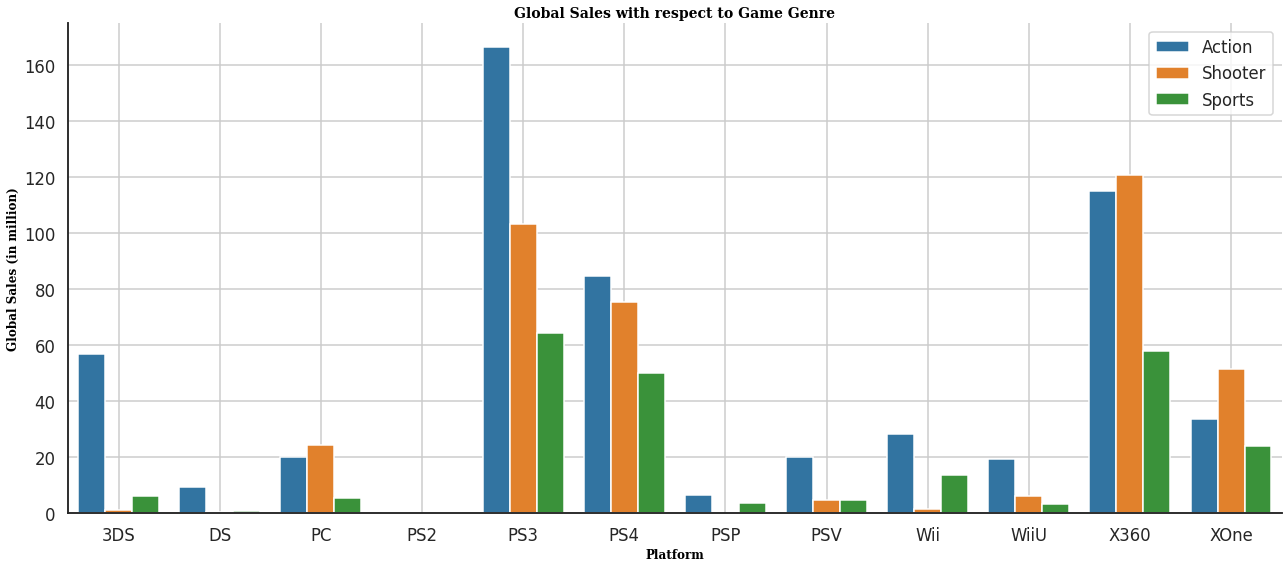

In [ ]:
# Top 3 Highest Genre in global in 2010's
top3 = ['Action', 'Shooter', 'Sports']
yr = 2010
yr_cond = (df['Year'] > yr)
top3_data = pd.DataFrame(df[yr_cond].groupby(by = ['Platform','Genre'])[['Global_Sales']].sum()).reset_index()
# Selecting Top 3 Genre
top3_data = top3_data[top3_data['Genre'].isin(top3)]

# Platform 
fig, ax = plt.subplots(figsize = (18,8))
sns.barplot(x = 'Platform', y = 'Global_Sales', data = top3_data, hue = 'Genre')

# X and Y 축
## Title
font_title = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 14,
        }
ax.set_title("Global Sales with respect to Game Genre", fontdict = font_title)


## Text
font_text = {
    'family': 'serif',
    'color':  'black',
    'weight': 'bold',
    'size': 12,
    }

plt.ylabel("Global Sales (in million)", fontdict = font_text)
plt.xlabel("Platform",fontdict = font_text)



# Background
for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)

ax.grid(True)
ax.set_facecolor('white')
plt.legend()
fig.tight_layout()
plt.show()


#### Customize Pie-Chart - Platform

In [ ]:
def pie_chart_platform(bottom_yr, upper_yr, r, genre):
  # yr = 년도 기준치 
  # r = Global Sale Percentage 기준치
  yr_cond = ( (df['Year'] > bottom_yr) & (df['Year'] <= upper_yr) )
  top3_data = pd.DataFrame(df[yr_cond].groupby(by = ['Platform','Genre'])[['Global_Sales']].sum()).reset_index()

  # Genre
  platform_top = top3_data[top3_data['Genre'] == genre]
  sum_global = platform_top['Global_Sales']
  platform_top['Percent_Global'] = 100* (platform_top['Global_Sales']/platform_top['Global_Sales'].sum())
  platform_top.sort_values(by = 'Global_Sales', ascending = False, inplace = True)

  ####### Combine all platforms with more than 3% global sales ###########
  # Conditions based on r%
  cond_above = (platform_top['Percent_Global'] >= r)
  cond_below = (platform_top['Percent_Global'] < r)

  # Above r%
  above = platform_top[cond_above].copy()
  above = above[['Platform', 'Percent_Global']]

  # Others
  new_row = pd.DataFrame(data = {
      'Platform' : ['Others'],
      'Percent_Global' : [platform_top['Percent_Global'][cond_below].sum()]
  })

  # Details in Others
  others = platform_top[cond_below].copy()
  others = others[['Platform', 'Percent_Global']]

  # Combining top 5 with others
  combined = pd.concat([above, new_row])
  combined.sort_values(by = 'Percent_Global', ascending= False, inplace = True)

  ################# Plotting #############################
  # Plotting -- for comparison left all countries and right the others combined
  fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (18,10))

  ## Combined
  combined_list = combined['Platform']
  sizes_comb = combined['Percent_Global']
  explode = np.ones(len(combined_list))/10

  axes[0].pie(sizes_comb, labels=combined_list, explode = explode, autopct='%1.1f%%',
              shadow=True, startangle=90, textprops={'fontsize': 20})
  axes[0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

  ## Details in Others
  others_list = others['Platform']
  sizes_other = others['Percent_Global']
  explode = np.ones(len(others_list))/10

  axes[1].pie(sizes_other, labels=others_list, explode = explode, autopct='%1.1f%%',
              shadow=True, startangle=90, textprops={'fontsize': 20})
  axes[1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


  ################ Text ########################
  ## Title
  font_title = {'family': 'serif',
          'color':  'black',
          'weight': 'bold',
          'size': 20,
          }
  ## Text
  font_text = {
      'family': 'serif',
      'color':  'black',
      'weight': 'bold',
      'size': 12,
      }
  axes[0].set_title('{0}: Platforms with more than {1}% Market-share \nin between {2} and {3}'.format(genre, r, bottom_yr, upper_yr), fontdict = font_title)
  axes[1].set_title('Details in Others', fontdict = font_title)

  plt.tight_layout()
  plt.show()

#### Pie Charts

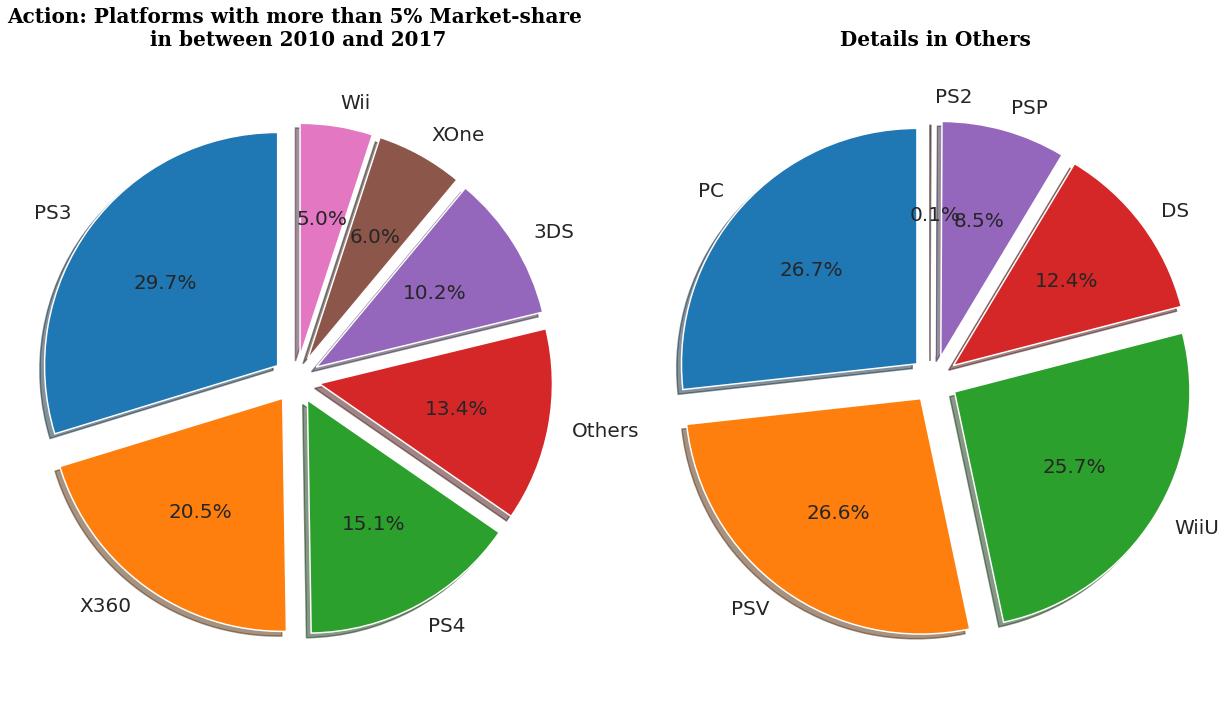

In [ ]:
pie_chart_platform(bottom_yr = 2010, upper_yr = 2017, r = 5, genre = 'Action')

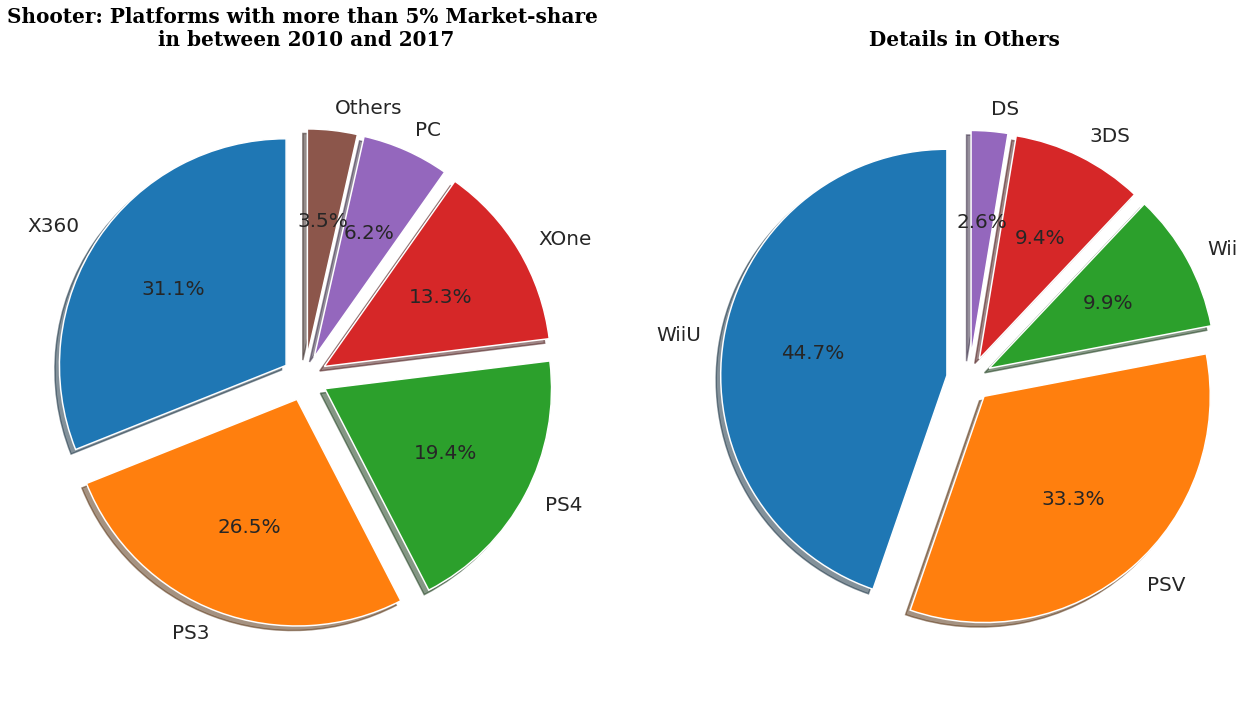

In [ ]:
pie_chart_platform(bottom_yr = 2010, upper_yr = 2017, r = 5, genre = 'Shooter')

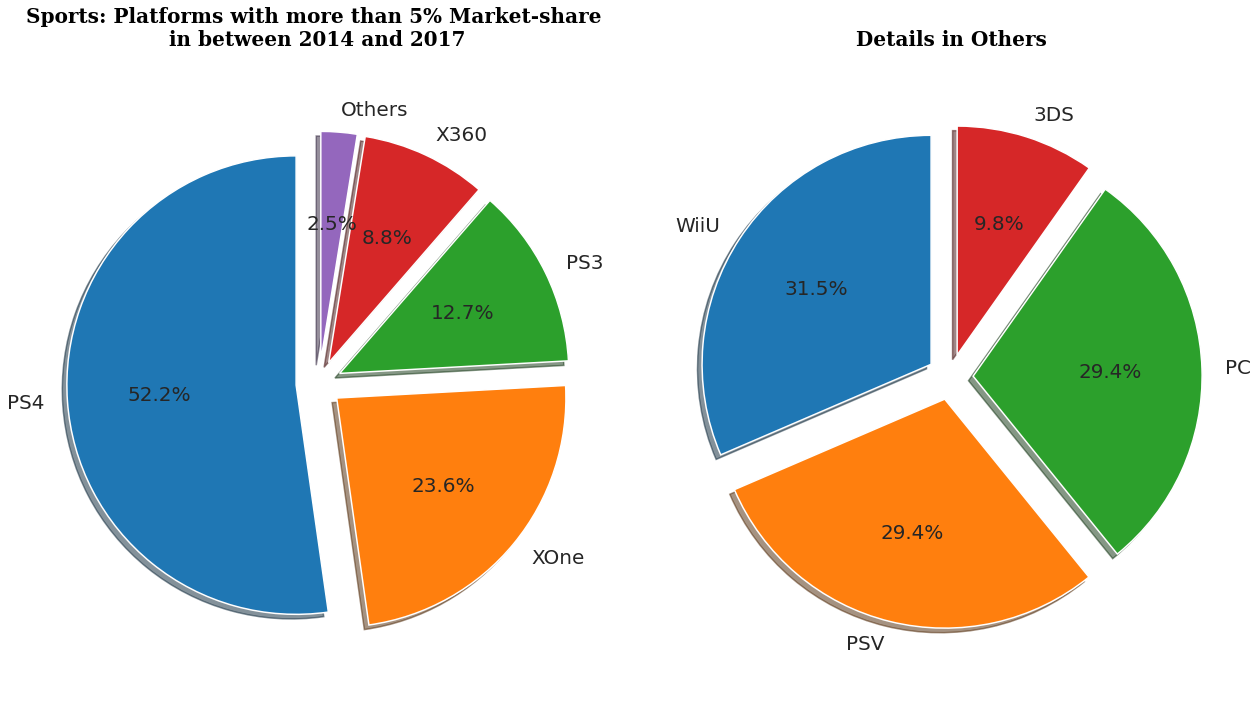

In [ ]:
pie_chart_platform(bottom_yr = 2014, upper_yr = 2017, r = 5, genre = 'Sports')

##### Customize barplot for Platform

In [ ]:
def cum_sales_platform(genre, yr):
  platform_df = df[(df['Platform'] == genre)].reset_index()
  platform_df.drop('index', axis = 1, inplace = True)
  platform_df = platform_df.groupby(by = 'Year')[['Global_Sales']].sum().reset_index()

  fig, axes = plt.subplots(figsize = (18,8))

  plt.bar('Year', 'Global_Sales', data = platform_df)

  # X and Y 축
  axes.set_title("Global Sales: {0} after {1}".format(genre, yr), size = 20)
  plt.ylabel("Global Sales (in million)")
  plt.xlabel("Year")

  ## X 축 범위설정
  yr_sort = list( np.sort(df['Year'].unique()) ) 
  x_axis = [yr_sort for yr_sort in yr_sort if yr_sort >= yr]
  plt.xticks(x_axis)

  ## Y 축 범위설정
  plt.yticks(range(0, 260, 40))

  # Background
  for spine in ["top", "right"]:
      axes.spines[spine].set_visible(False)

  axes.grid(True)
  axes.set_facecolor('#E0E0E0')

  plt.show()


##### PS2

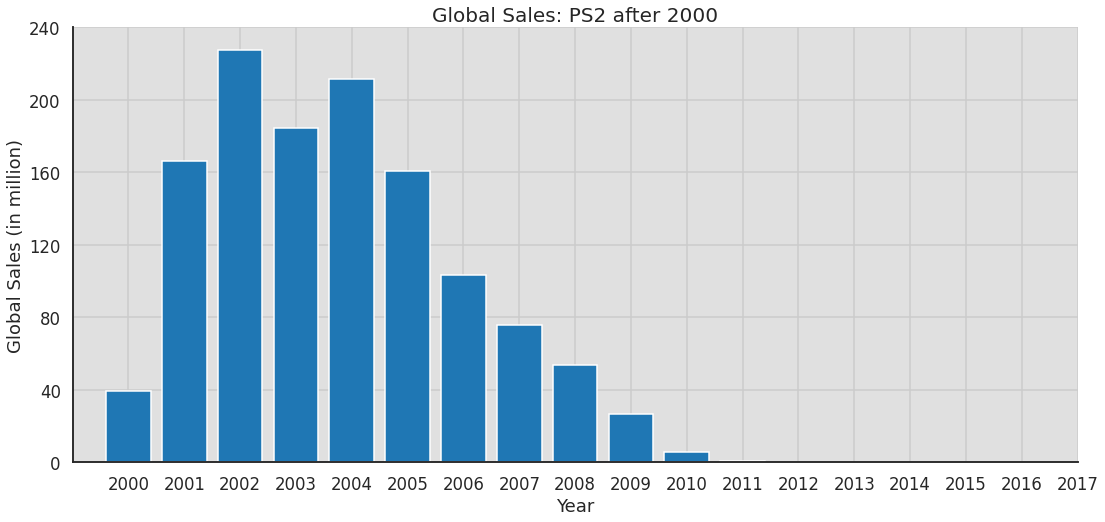

In [ ]:
cum_sales_platform(genre = 'PS2', yr = 2000)

##### X360

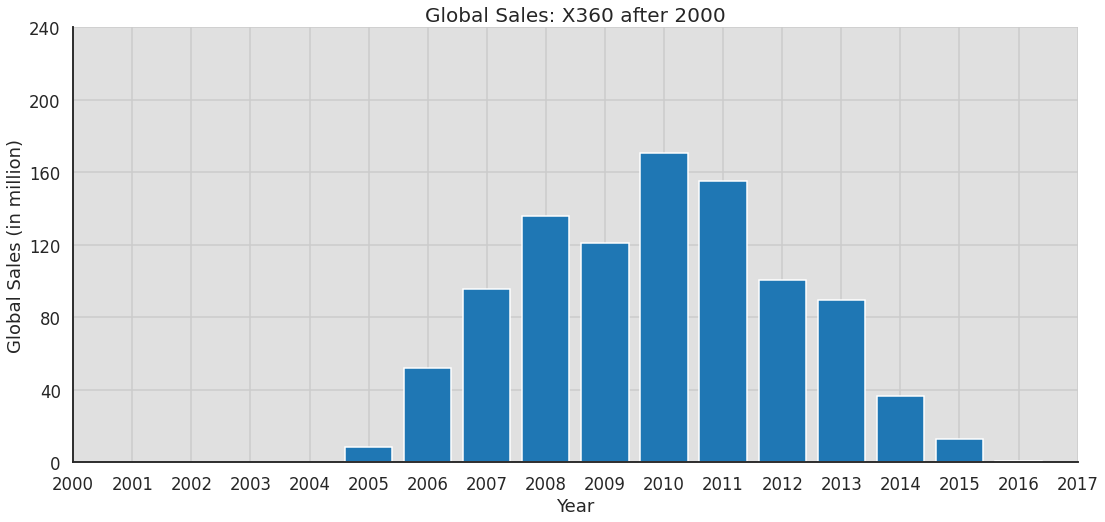

In [ ]:
cum_sales_platform(genre = 'X360', yr = 2000)

##### PS3

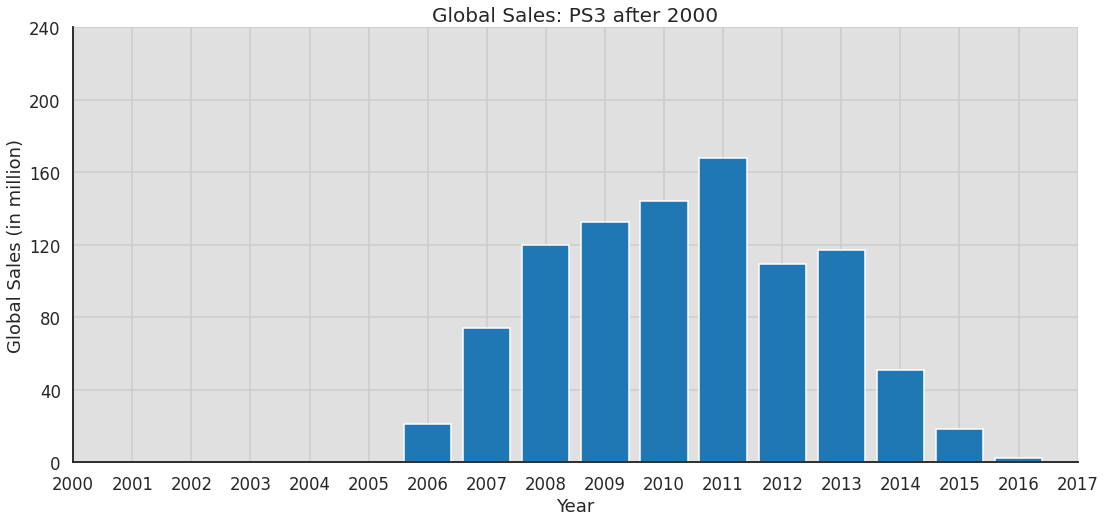

In [ ]:
cum_sales_platform(genre = 'PS3', yr = 2000)

##### Wii

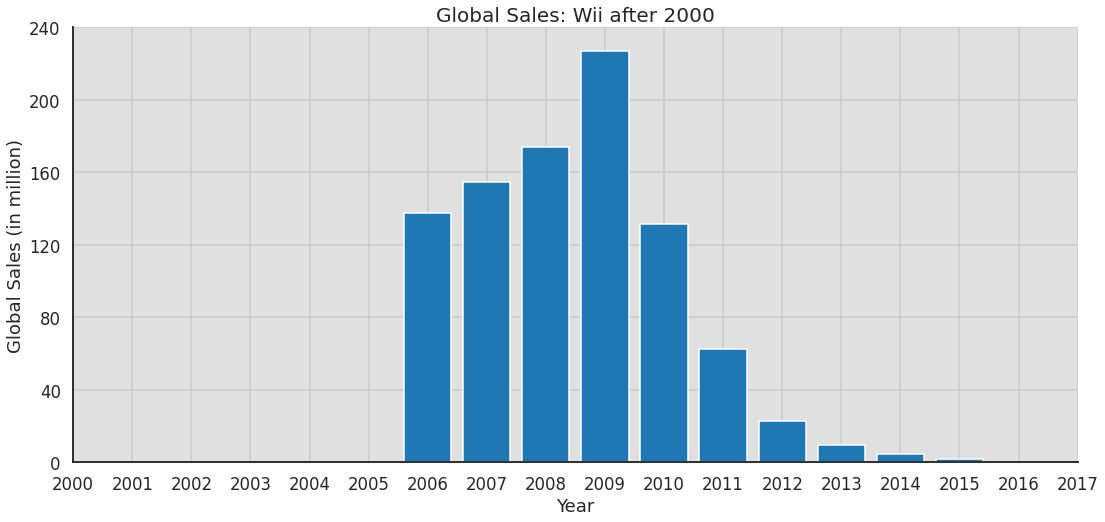

In [ ]:
cum_sales_platform(genre = 'Wii', yr = 2000)

##### PS4

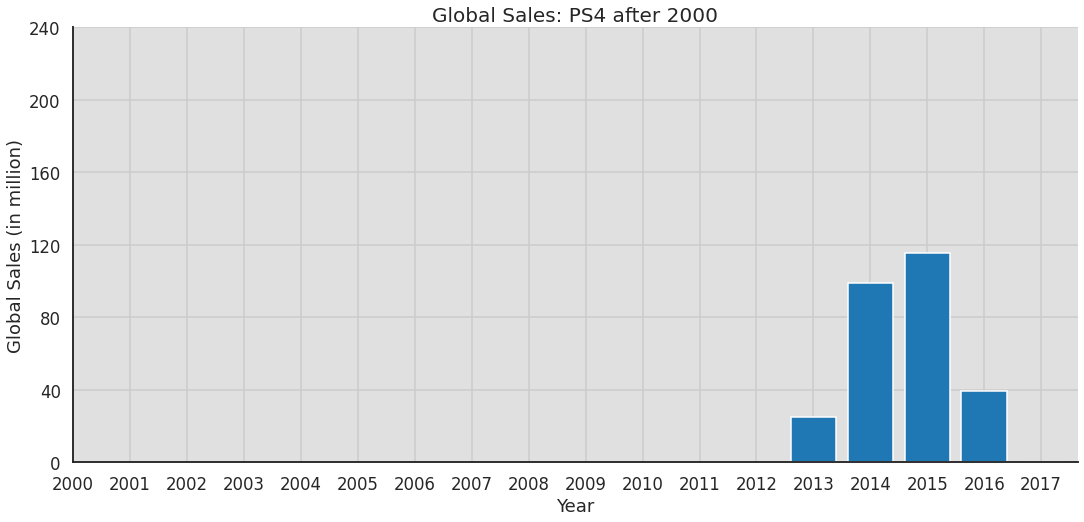

In [ ]:
cum_sales_platform(genre = 'PS4', yr = 2000)

#### 지역

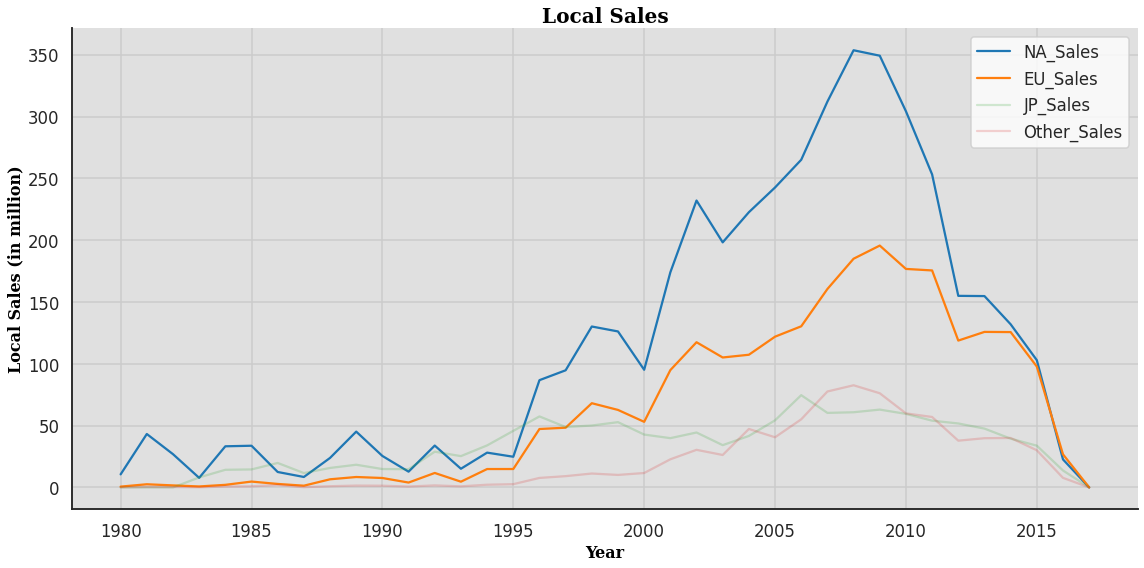

In [ ]:
loc_list = ['NA_Sales','EU_Sales','JP_Sales','Other_Sales']
fig, ax = plt.subplots(figsize = (16,8))

# Top 3 Highest Genre
top3 = ['NA_Sales','EU_Sales']

# Plotting
for loc in loc_list:
  loc_cond = (df['Genre'] == gr)
  # Gradient Line
  if loc in top3:
    alpha = 1
  else:
    alpha = 0.2
  # Line plot
  plt.plot('Year',loc,data =  pd.DataFrame(df.groupby(by = ['Year'])[['NA_Sales','EU_Sales','JP_Sales','Other_Sales']].sum()).reset_index(), label = loc, alpha = alpha)



# X and Y 축
## Title
font_title = {'family': 'serif',
        'color':  'black',
        'weight': 'bold',
        'size': 20,
        }
ax.set_title("Local Sales", fontdict = font_title)


## Text
font_text = {
    'family': 'serif',
    'color':  'black',
    'weight': 'bold',
    'size': 16,
    }

plt.ylabel("Local Sales (in million)", fontdict = font_text)
plt.xlabel("Year",fontdict = font_text)



# Background
for spine in ["top", "right"]:
    ax.spines[spine].set_visible(False)



ax.grid(True)
ax.set_facecolor('#E0E0E0')
plt.legend()
fig.tight_layout()
plt.show()

## 그렇다면 다음 게임은 어떤 특성을 가져야 할까?

* 플랫폼: 70~80%의 플랫폼을 차지하는 PS3, PS4, X360으로 집중 

* 장르: 선호도가 가장 높은 액션, 슈팅, 스포츠

* 지역타겟: 비디오게임시장이 큰 남미, 유럽
